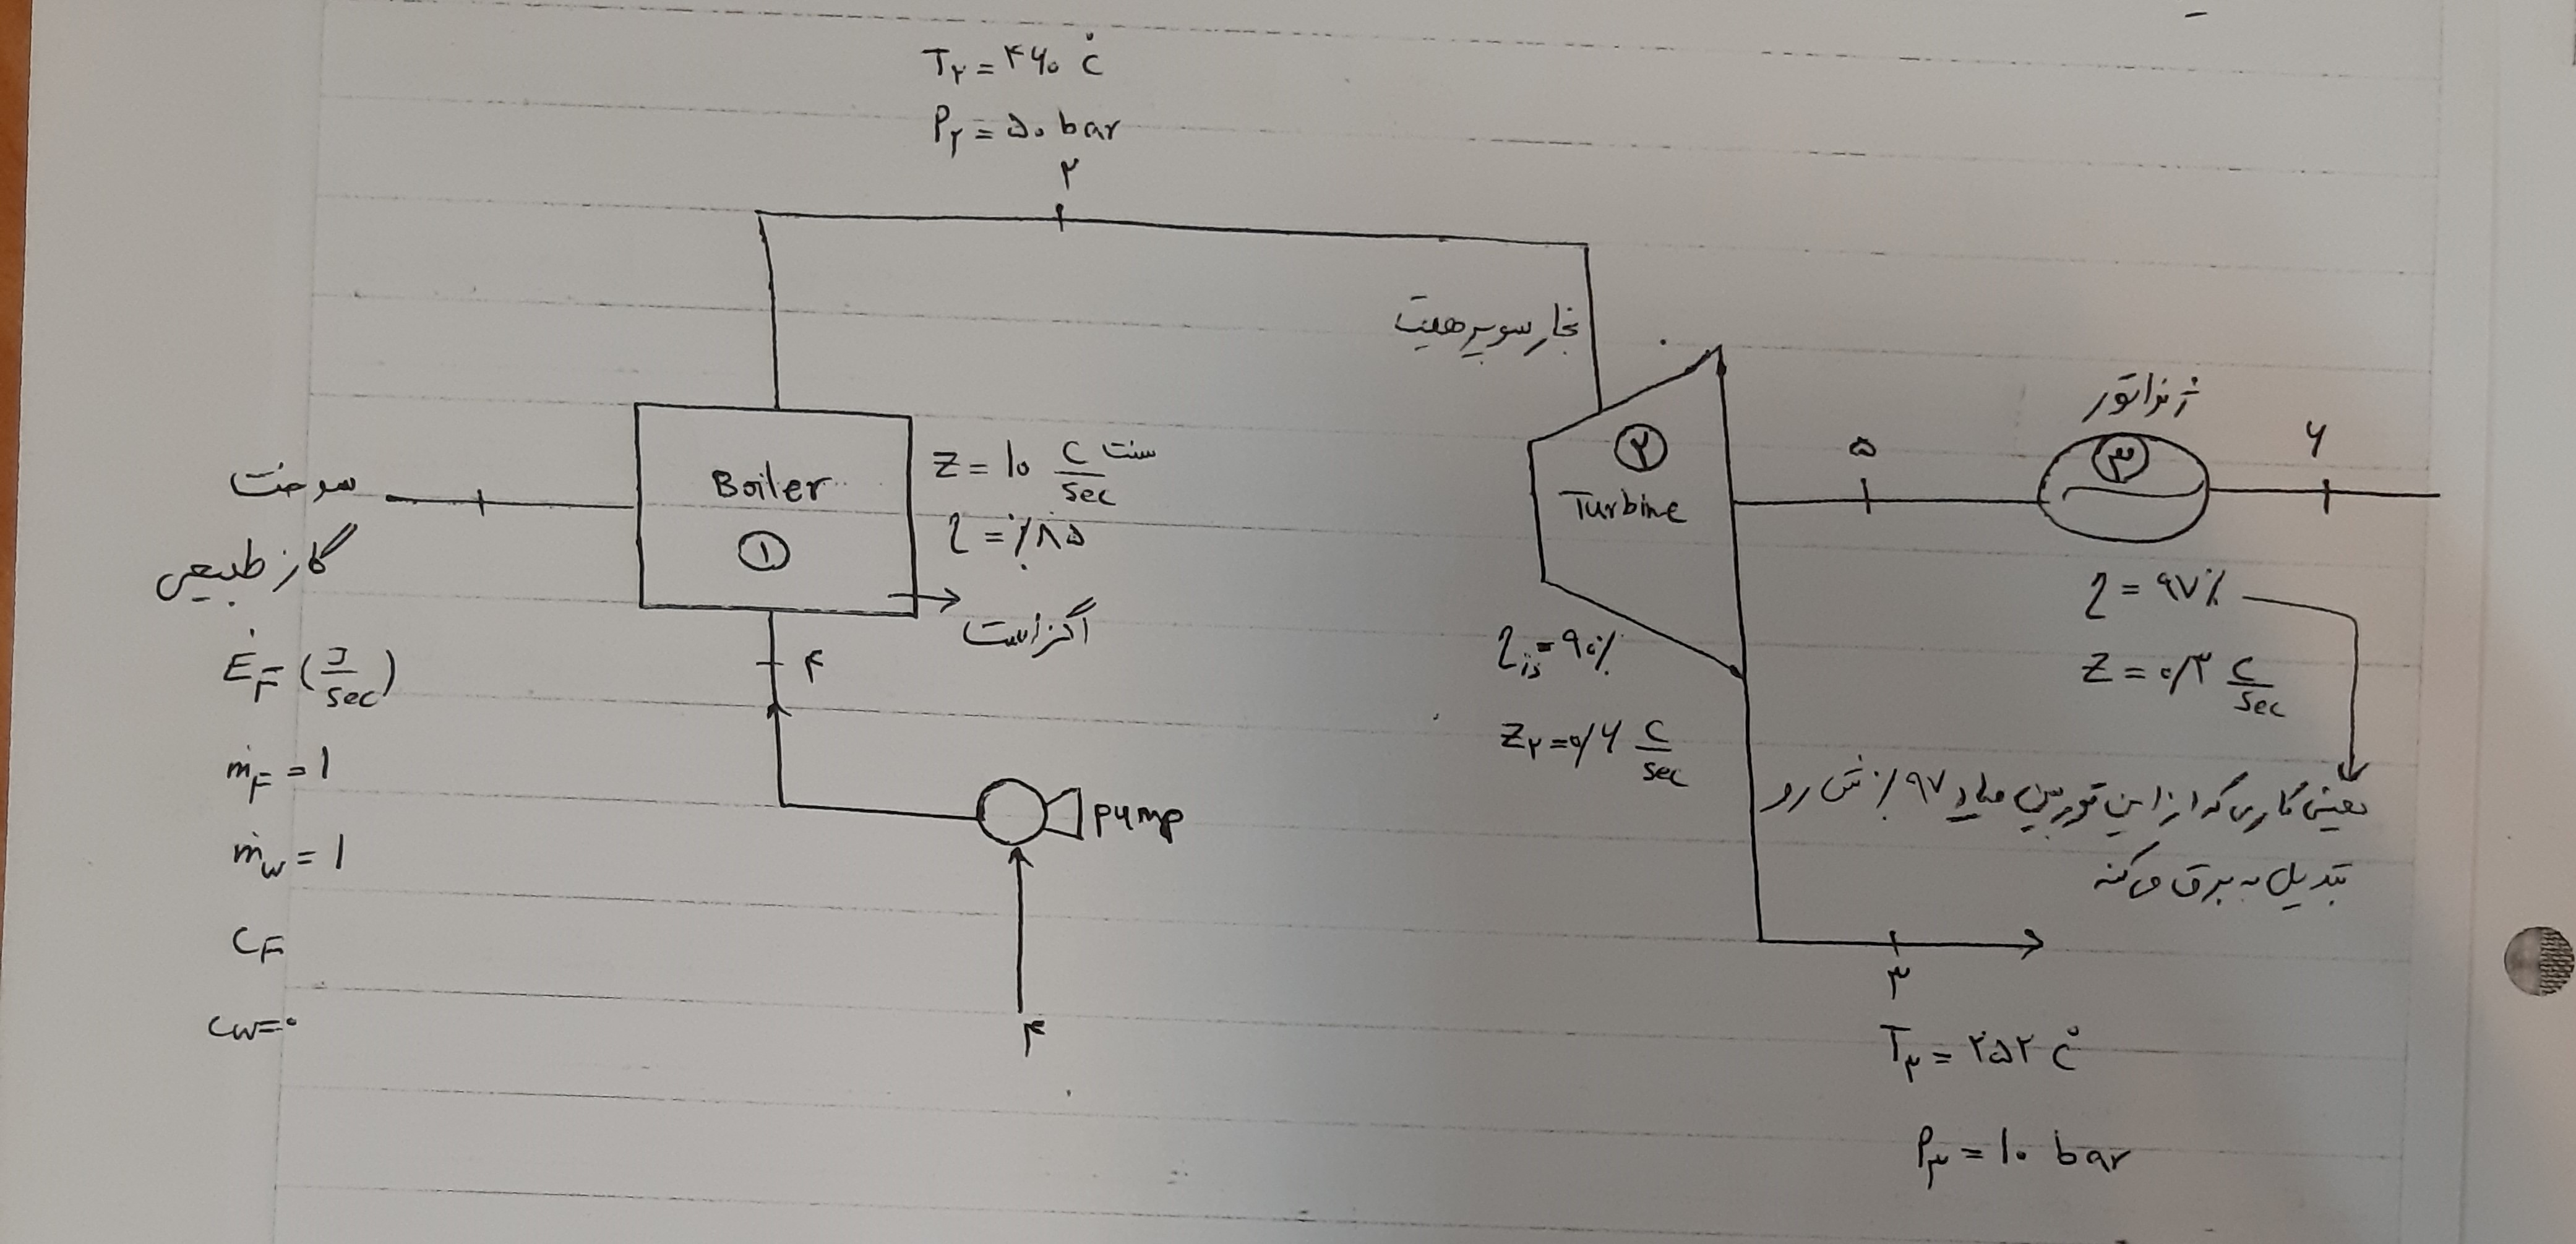

In [3]:
import numpy as np
import CoolProp.CoolProp as CP
from CoolProp.CoolProp import PropsSI

## P(paskal)
## T(k)
## H(j/kg)
T0=298.15; #K
P0=101300;

########################### Enthalpy calculation ######################

h1=(0.68*PropsSI('H','T',T0,'P', P0,'Methane')+0.32*PropsSI('H','T',T0,'P', P0,'Ethane')) ## j/kg
h2=PropsSI('H','T',733.15,'P', 5000000,'Water')
h3=PropsSI('H','T',525.15,'P', 1000000,'Water')
h4=PropsSI('H','T',T0,'P', 5000000,'Water')
print('h1 (j/kg): ',h1)
print('h2 (j/kg) :  ',h2)
print('h3 (j/kg) :  ',h3)
print('h4 (j/kg):  ',h4)

########################### exergy calculation  ########################

S1= -(0.68*PropsSI('S','T',T0,'P',P0,'Methane')+0.32*PropsSI('S','T',T0,'P',P0,'Ethane'))
S2=PropsSI('S','T',733.15,'P',5000000,'Water')
S3=PropsSI('S','T',525.15,'P',1000000,'Water')
S4=PropsSI('S','T',T0,'P',5000000,'Water')
Edot1=h1-T0*S1;
Edot2=h2-T0*S2;
Edot3=h3-T0*S3;
Edot4=h4-T0*S4;
Nt=0.9; ## efficiency of turbine
Ng=0.97; ## efficiency of generator
Edot5= Nt *(Edot2-Edot3)
Edot6=Ng*Edot5
print('Edot1 (w or j/s)  :  ',Edot1)
print('Edot2  (w or j/s): ',Edot2)
print('Edot3  (w or j/s):  ',Edot3)
print('Edot4  (w or j/s):  ',Edot4)
print('Edot5  (w or j/s):  ',Edot5)
print('Edot6  (w or j/s):  ',Edot6)

######################## exergy product and fuel ###########

Exergy_product_turbine=Edot5
Exergy_fuel_turbine=Edot2-Edot3
Exergy_product_boiler=Edot2
Exergy_fuel_boiler=Edot1+Edot4
Exergy_product_generator=Edot6
Exergy_fuel_generator=Edot5

print('Exergy_product_turbine (w)  :  ',Exergy_product_turbine)
print('Exergy_fuel_turbine  (w): ',Exergy_fuel_turbine)
print('Exergy_product_boiler  (w):  ',Exergy_product_boiler)
print('Exergy_fuel_boiler  (w):  ',Exergy_fuel_boiler)
print('Exergy_product_generator  (w):  ',Exergy_product_generator)
print('Exergy_fuel_generator  (w):  ',Exergy_fuel_generator)

####################### exergoeconomic ##################

Zdot1=10; #cent/s
Zdot2=0.6;
Zdot3=0.3;
Cw=0      
Cf=0.000603; #cent/j
C1=Cf;
C4=Cw;

#(C2*Edot2)-(C4*Edot4)=(C1*Edot1)+Zdot1   for boiler
#C5*Edot5+C3*Edot3-C2*Edot2=Zdot2         for turbine
#C6*Edot6-C5*Edot5=Zdot3                 for generator
#C2=C3;                                 for help

A = np.array([[Edot2, 0, 0,0], [-Edot2, Edot3, Edot5,0], [0, 0,-Edot5,Edot6 ], [1, -1, 0,0]])     
b = np.array([(C1*Edot1)+Zdot1, Zdot2, Zdot3 ,0])
x = np.linalg.solve(A, b)
print('[C2($/j) ,C3($/j) ,C5($/j), C6($/j) ]  : '  ,x)
######################## exergy dist ###########

EDb=Edot1+Edot4-Edot2;
EDt=Edot2-Edot3-Edot5;
EDg=(Edot5-Edot6);
print('EDb (w)  :  ',EDb) \\\\\\\\\\\\\\\\\\\\JMN \H MJHNH
print('EDg  (w):  ',EDg)

      ##### rate of exergy dist #####
    
Ef=Exergy_fuel_turbine+Exergy_fuel_boiler+Exergy_fuel_generator;
yDb=EDb/Ef;
yDt=EDt/Ef;
yDg=EDg/Ef;
yDtot=(EDb+EDt+EDg)/Ef;

print('Exergy dist ratio for boiler  :  ',yDb)
print('Exergy dist ratio for turbine  : ',yDt)
print('Exergy dist ratio for generator  :  ',yDg)
print('Exergy dist ratio for total:  ',yDtot)



h1 (j/kg):  832458.4402662531
h2 (j/kg) :   3340861.169602102
h3 (j/kg) :   2947539.2259468557
h4 (j/kg):   109447.43130897824
Edot1 (w or j/s)  :   2509936.4290535627
Edot2  (w or j/s):  1297486.5313880695
Edot3  (w or j/s):   879895.9651968405
Edot4  (w or j/s):   347.3087841182132
Edot5  (w or j/s):   375831.5095721061
Edot6  (w or j/s):   364556.5642849429
Exergy_product_turbine (w)  :   375831.5095721061
Exergy_fuel_turbine  (w):  417590.56619122904
Exergy_product_boiler  (w):   1297486.5313880695
Exergy_fuel_boiler  (w):   2510283.737837681
Exergy_product_generator  (w):   364556.5642849429
Exergy_fuel_generator  (w):   375831.5095721061
[C2($/j) ,C3($/j) ,C5($/j), C6($/j) ]  :  [0.00117419 0.00117419 0.00130625 0.00134747]
EDb (w)  :   1212797.2064496116
EDt  (w):  41759.056619122915
EDg  (w):   11274.945287163195
Exergy dist ratio for boiler  :   0.36710205898377835
Exergy dist ratio for turbine  :  0.012640065119359353
Exergy dist ratio for generator  :   0.0034128175822270277